❓ Problem Statement
Analyze Acme Co.’s 2014–2018 sales data to identify key revenue and profit drivers across products, channels, and regions; uncover seasonal trends and outliers; and align performance against budgets. Use these insights to optimize pricing, promotions, and market expansion for sustainable growth and reduced concentration risk.

🎯 Objective
Deliver actionable insights from Acme Co.’s 2014–2018 sales data to:

Identify top-performing products, channels, and regions driving revenue and profit
Uncover seasonal trends and anomalies for optimized planning
Spot pricing and margin risks from outlier transactions
Inform pricing, promotion, and market-expansion strategies
These findings will guide the design of a Power BI dashboard to support strategic decision-making and sustainable growth.


In [92]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [93]:
sheets=pd.read_excel('/Regional Sales Dataset.xlsx',sheet_name=None)

In [94]:
df_sales=sheets['Sales Orders']
df_customers=sheets['Customers']
df_products=sheets['Products']
df_regions=sheets['Regions']
df_state_reg=sheets['State Regions']
df_budgets=sheets['2017 Budgets']

In [95]:
df_sales.shape

(64104, 12)

In [96]:
print(f"df_Sales",df_sales.shape)
print(f"df_customers",df_customers.shape)
print(f"df_products",df_products.shape)
print(f"df_regions",df_regions.shape)
print(f"df_state_reg",df_state_reg.shape)
print(f"df_budgtes",df_budgets.shape)

df_Sales (64104, 12)
df_customers (175, 2)
df_products (30, 2)
df_regions (994, 15)
df_state_reg (49, 3)
df_budgtes (30, 2)


In [97]:
df_sales.head()

OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2014-01-01                  126    Wholesale           USD   
1  SO - 0003378 2014-01-01                   96  Distributor           USD   
2  SO - 0005126 2014-01-01                    8    Wholesale           USD   
3  SO - 0005614 2014-01-01                   42       Export           USD   
4  SO - 0005781 2014-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  Line Total  Total Unit Cost  
0               6      2499.1     14994.6         1824.343  
1              11      2351.7     25868.7         1269.918  
2               6       978.2      5869.2          684.740  
3               7      2338.3     16368.1         1028.852  
4               8      2291.4     18331.2         1260.270

In [98]:
df_customers.head()

Customer Index Customer Names
0               1  Geiss Company
1               2  Jaxbean Group
2               3     Ascend Ltd
3               4      Eire Corp
4               5   Blogtags Ltd

In [99]:
df_regions.head()

id        name                                   county state_code  \
0   1      Auburn                               Lee County         AL   
1   2  Birmingham           Shelby County/Jefferson County         AL   
2   3     Decatur           Limestone County/Morgan County         AL   
3   4      Dothan  Dale County/Houston County/Henry County         AL   
4   5      Hoover           Shelby County/Jefferson County         AL   

     state  type  latitude  longitude  area_code  population  households  \
0  Alabama  City  32.60986  -85.48078        334       62059       21767   
1  Alabama  City  33.52744  -86.79905        205      212461       89972   
2  Alabama  City  34.57332  -86.99214        256       55437       22294   
3  Alabama  City  31.23370  -85.40682        334       68567       25913   
4  Alabama  City  33.37695  -86.80558        205       84848       32789   

   median_income  land_area  water_area        time_zone  
0          38342  152375113     2646161  America/Chicago  
1          31061  378353942     6591013  America/Chicago  
2          41496  141006257    17594716  America/Chicago  
3          42426  232166237      835468  America/Chicago  
4          77146  122016784     2553332  America/Chicago

In [100]:
df_products.head()

Index Product Name
0      1    Product 1
1      2    Product 2
2      3    Product 3
3      4    Product 4
4      5    Product 5

In [101]:
df_state_reg.head()

Column1     Column2 Column3
0  State Code       State  Region
1          AL     Alabama   South
2          AR    Arkansas   South
3          AZ     Arizona    West
4          CA  California    West

In [102]:
#here in the above the header is not correctly inherited so changing manually
new_header=df_state_reg.iloc[0]
df_state_reg.columns=new_header
df_state_reg=df_state_reg[1:].reset_index(drop=True)
df_state_reg.head()


0 State Code       State Region
0         AL     Alabama  South
1         AR    Arkansas  South
2         AZ     Arizona   West
3         CA  California   West
4         CO    Colorado   West

In [103]:
#To check the null values

df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [104]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [105]:
df_customers.isnull().sum()

Customer Index    0
Customer Names    0
dtype: int64

In [106]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [107]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [108]:
df_state_reg.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

In [109]:
df_budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

In [110]:
df_customers.head()

Customer Index Customer Names
0               1  Geiss Company
1               2  Jaxbean Group
2               3     Ascend Ltd
3               4      Eire Corp
4               5   Blogtags Ltd

Data Cleaning & Wrangling

In [111]:
#Merging data within togethe
#Merge with cisuomers

df=df_sales.merge(
    df_customers,
    how='left',
    left_on="Customer Name Index",
    right_on="Customer Index"
                  )

In [112]:
df.head()   #clearly we can see the customer index and Customer names from the df_customer can be added

OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2014-01-01                  126    Wholesale           USD   
1  SO - 0003378 2014-01-01                   96  Distributor           USD   
2  SO - 0005126 2014-01-01                    8    Wholesale           USD   
3  SO - 0005614 2014-01-01                   42       Export           USD   
4  SO - 0005781 2014-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  Line Total  Total Unit Cost  Customer Index  \
0               6      2499.1     14994.6         1824.343             126   
1              11      2351.7     25868.7         1269.918              96   
2               6       978.2      5869.2          684.740               8   
3               7      2338.3     16368.1         1028.852              42   
4               8      2291.4     18331.2         1260.270              73   

     Customer Names  
0     Rhynoodle Ltd  
1    Thoughtmix Ltd  
2   Amerisourc Corp  
3  Colgate-Pa Group  
4     Deseret Group

In [113]:
#Merge with products
df=df.merge(df_products,
            how='left',
            left_on='Product Description Index',
            right_on='Index')

df.head()

OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2014-01-01                  126    Wholesale           USD   
1  SO - 0003378 2014-01-01                   96  Distributor           USD   
2  SO - 0005126 2014-01-01                    8    Wholesale           USD   
3  SO - 0005614 2014-01-01                   42       Export           USD   
4  SO - 0005781 2014-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  Line Total  Total Unit Cost  Customer Index  \
0               6      2499.1     14994.6         1824.343             126   
1              11      2351.7     25868.7         1269.918              96   
2               6       978.2      5869.2          684.740               8   
3               7      2338.3     16368.1         1028.852              42   
4               8      2291.4     18331.2         1260.270              73   

     Customer Names  Index Product Name  
0     Rhynoodle Ltd     27   Product 27  
1    Thoughtmix Ltd     20   Product 20  
2   Amerisourc Corp     26   Product 26  
3  Colgate-Pa Group      7    Product 7  
4     Deseret Group      8    Product 8

In [114]:
#Merge with Regions
df=df.merge(df_regions,
            how='left',
            left_on='Delivery Region Index',
            right_on='id')
df.head()

OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2014-01-01                  126    Wholesale           USD   
1  SO - 0003378 2014-01-01                   96  Distributor           USD   
2  SO - 0005126 2014-01-01                    8    Wholesale           USD   
3  SO - 0005614 2014-01-01                   42       Export           USD   
4  SO - 0005781 2014-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  ...  type  latitude  longitude area_code  \
0               6      2499.1  ...  City  32.08354  -81.09983       912   
1              11      2351.7  ...  City  39.61366  -86.10665       317   
2               6       978.2  ...  City  37.66243 -121.87468       925   
3               7      2338.3  ...  City  39.16533  -86.52639       812   
4               8      2291.4  ...  Town  41.77524  -72.52443       959   

   population households  median_income  land_area water_area  \
0      145674      52798          36466  268318796   13908113   
1       55586      20975          54176   72276415       1883   
2       79510      26020         124759   62489257     386195   
3       84067      30232          30019   60221613     475857   
4       58007      24141          63158   70972793     720300   

                      time_zone  
0              America/New York  
1  America/Indiana/Indianapolis  
2           America/Los Angeles  
3  America/Indiana/Indianapolis  
4              America/New York  

[5 rows x 31 columns]

In [115]:
#last we have to merge state region with the df
df=df.merge(df_state_reg[['State Code','Region']],
            how='left',
            left_on='state_code',
            right_on='State Code')
df.head()

OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2014-01-01                  126    Wholesale           USD   
1  SO - 0003378 2014-01-01                   96  Distributor           USD   
2  SO - 0005126 2014-01-01                    8    Wholesale           USD   
3  SO - 0005614 2014-01-01                   42       Export           USD   
4  SO - 0005781 2014-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  ...  longitude  area_code  population  \
0               6      2499.1  ...  -81.09983        912      145674   
1              11      2351.7  ...  -86.10665        317       55586   
2               6       978.2  ... -121.87468        925       79510   
3               7      2338.3  ...  -86.52639        812       84067   
4               8      2291.4  ...  -72.52443        959       58007   

  households  median_income  land_area  water_area  \
0      52798          36466  268318796    13908113   
1      20975          54176   72276415        1883   
2      26020         124759   62489257      386195   
3      30232          30019   60221613      475857   
4      24141          63158   70972793      720300   

                      time_zone State Code     Region  
0              America/New York         GA      South  
1  America/Indiana/Indianapolis         IN    Midwest  
2           America/Los Angeles         CA       West  
3  America/Indiana/Indianapolis         IN    Midwest  
4              America/New York         CT  Northeast  

[5 rows x 33 columns]

In [116]:
#now we have to merge the 2017 budnget as weel
df=df.merge(df_budgets,
            how='left',
            on='Product Name')

In [117]:
df.to_csv("File.csv")

In [118]:

from google.colab import files
files.download("File.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [119]:
# Now we have created a file and donwlaed it. Howver as per checking this files contain duplicate colums which need to be deleted
#clean up the redundant columsn
cols_to_drop=['Customer Index', 'Index', 'id', 'State Code']

df=df.drop(columns=cols_to_drop, errors='ignore')
df.head()


#initially 35 columns were there now only 32 colums

OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2014-01-01                  126    Wholesale           USD   
1  SO - 0003378 2014-01-01                   96  Distributor           USD   
2  SO - 0005126 2014-01-01                    8    Wholesale           USD   
3  SO - 0005614 2014-01-01                   42       Export           USD   
4  SO - 0005781 2014-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  ...  longitude  area_code population  \
0               6      2499.1  ...  -81.09983        912     145674   
1              11      2351.7  ...  -86.10665        317      55586   
2               6       978.2  ... -121.87468        925      79510   
3               7      2338.3  ...  -86.52639        812      84067   
4               8      2291.4  ...  -72.52443        959      58007   

  households median_income  land_area water_area  \
0      52798         36466  268318796   13908113   
1      20975         54176   72276415       1883   
2      26020        124759   62489257     386195   
3      30232         30019   60221613     475857   
4      24141         63158   70972793     720300   

                      time_zone     Region  2017 Budgets  
0              America/New York      South    964940.231  
1  America/Indiana/Indianapolis    Midwest   2067108.120  
2           America/Los Angeles       West   5685138.270  
3  America/Indiana/Indianapolis    Midwest    889737.555  
4              America/New York  Northeast   1085037.329  

[5 rows x 30 columns]

In [120]:
#convert all columns to lowecare

df.columns=df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [121]:
#now need to check which check which columns which we dont gonna use and delete them,

In [122]:
#keep the important columns and elte the coumns whihc is not needed

cols_to_keep=['ordernumber',
             'orderdate',
             'customer names',
             'channel',
             'product name',
             'order quantity',
             'unit price',
             'line total',
             'total unit cost',
             'state_code',
             'county',
             'state',
             'region',
             'latitude',
             'longitude',
              '2017 budgets']

In [123]:
df=df[cols_to_keep]
df.head()

ordernumber  orderdate    customer names      channel product name  \
0   SO - 000225 2014-01-01     Rhynoodle Ltd    Wholesale   Product 27   
1  SO - 0003378 2014-01-01    Thoughtmix Ltd  Distributor   Product 20   
2  SO - 0005126 2014-01-01   Amerisourc Corp    Wholesale   Product 26   
3  SO - 0005614 2014-01-01  Colgate-Pa Group       Export    Product 7   
4  SO - 0005781 2014-01-01     Deseret Group    Wholesale    Product 8   

   order quantity  unit price  line total  total unit cost state_code  \
0               6      2499.1     14994.6         1824.343         GA   
1              11      2351.7     25868.7         1269.918         IN   
2               6       978.2      5869.2          684.740         CA   
3               7      2338.3     16368.1         1028.852         IN   
4               8      2291.4     18331.2         1260.270         CT   

            county        state     region  latitude  longitude  2017 budgets  
0   Chatham County      Georgia      South  32.08354  -81.09983    964940.231  
1   Johnson County      Indiana    Midwest  39.61366  -86.10665   2067108.120  
2   Alameda County   California       West  37.66243 -121.87468   5685138.270  
3    Monroe County      Indiana    Midwest  39.16533  -86.52639    889737.555  
4  Hartford County  Connecticut  Northeast  41.77524  -72.52443   1085037.329

In [124]:
#renamem the colum s
df=df.rename(columns={
    "ordernumber":'order_number',
    "orderdate":'order_date',
    "customer name":'customer_name',
    'product name':'product_name',
    'order quantity':'order_quantity',
    'unit price':'unit_price',
    'line total':'revenue',
    'total_unit_cost':'cost',
    'state_code':'state',
    'state':'state_name',
    'latitude':'lat',
    'longitude':'long',
    '2017 budgets':'budgets'


})
df.head()

order_number order_date    customer names      channel product_name  \
0   SO - 000225 2014-01-01     Rhynoodle Ltd    Wholesale   Product 27   
1  SO - 0003378 2014-01-01    Thoughtmix Ltd  Distributor   Product 20   
2  SO - 0005126 2014-01-01   Amerisourc Corp    Wholesale   Product 26   
3  SO - 0005614 2014-01-01  Colgate-Pa Group       Export    Product 7   
4  SO - 0005781 2014-01-01     Deseret Group    Wholesale    Product 8   

   order_quantity  unit_price  revenue  total unit cost state  \
0               6      2499.1  14994.6         1824.343    GA   
1              11      2351.7  25868.7         1269.918    IN   
2               6       978.2   5869.2          684.740    CA   
3               7      2338.3  16368.1         1028.852    IN   
4               8      2291.4  18331.2         1260.270    CT   

            county   state_name     region       lat       long      budgets  
0   Chatham County      Georgia      South  32.08354  -81.09983   964940.231  
1   Johnson County      Indiana    Midwest  39.61366  -86.10665  2067108.120  
2   Alameda County   California       West  37.66243 -121.87468  5685138.270  
3    Monroe County      Indiana    Midwest  39.16533  -86.52639   889737.555  
4  Hartford County  Connecticut  Northeast  41.77524  -72.52443  1085037.329

In [125]:
#Blank out budgets for non 2017 orders
df.loc[df['order_date'].dt.year !=2017,'budgets']=pd.NA

df[['order_date','product_name','revenue','budgets']].head()

order_date product_name  revenue  budgets
0 2014-01-01   Product 27  14994.6      NaN
1 2014-01-01   Product 20  25868.7      NaN
2 2014-01-01   Product 26   5869.2      NaN
3 2014-01-01    Product 7  16368.1      NaN
4 2014-01-01    Product 8  18331.2      NaN

In [126]:
df[['order_date','product_name','revenue','budgets']].tail()

order_date product_name  revenue  budgets
64099 2018-02-28   Product 26  21788.4      NaN
64100 2018-02-28   Product 21   5185.8      NaN
64101 2018-02-28   Product 13  43483.0      NaN
64102 2018-02-28   Product 20  27717.9      NaN
64103 2018-02-28   Product 15   7986.4      NaN

In [127]:
df.to_csv('Final.csv')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   customer names   64104 non-null  object        
 3   channel          64104 non-null  object        
 4   product_name     64104 non-null  object        
 5   order_quantity   64104 non-null  int64         
 6   unit_price       64104 non-null  float64       
 7   revenue          64104 non-null  float64       
 8   total unit cost  64104 non-null  float64       
 9   state            64104 non-null  object        
 10  county           64104 non-null  object        
 11  state_name       64104 non-null  object        
 12  region           64104 non-null  object        
 13  lat              64104 non-null  float64       
 14  long             64104 non-null  float

In [129]:
#Now filter the datset to inlcude only records from 2017
df_2017=df[df['order_date'].dt.year==2017]

In [130]:
df_2017.head()

order_number order_date  customer names    channel product_name  \
46363  SO - 0002544 2017-01-01       NCS Group  Wholesale   Product 30   
46364  SO - 0006431 2017-01-01      Epic Group  Wholesale   Product 13   
46365  SO - 0007491 2017-01-01       State Ltd  Wholesale   Product 15   
46366  SO - 0008741 2017-01-01  Fivebridge Ltd  Wholesale    Product 8   
46367  SO - 0009295 2017-01-01     Tagfeed Ltd  Wholesale    Product 2   

       order_quantity  unit_price  revenue  total unit cost state  \
46363               6      1239.5   7437.0         1028.785    NJ   
46364               5      1829.1   9145.5         1207.206    CO   
46365               9      2412.0  21708.0         1664.280    CA   
46366               8       904.5   7236.0          750.735    IA   
46367              12      1112.2  13346.4          811.906    FL   

                   county  state_name     region       lat       long  \
46363       Hudson County  New Jersey  Northeast  40.77955  -74.02375   
46364         Mesa County    Colorado       West  39.06387 -108.55065   
46365  Los Angeles County  California       West  33.96168 -118.35313   
46366      Dubuque County        Iowa    Midwest  42.50056  -90.66457   
46367     Hernando County     Florida      South  28.47689  -82.52546   

           budgets  
46363  1011609.684  
46364  3720639.645  
46365  3299478.315  
46366  1085037.329  
46367  3050087.565

In [131]:
#Feauture engineering

Feature engineering
Feature Engineering is the process of creating, modifying, or selecting the right features (columns) from raw data to help the model learn better and make more accurate predictions.


In [134]:
df['total_cost'] = df['order_quantity'] * df['total unit cost']

# 2. Calculate profit as revenue minus total_cost
df['profit'] = df['revenue'] - df['total_cost']

# 3. Calculate profit margin as a percentage
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# 4. Extract full month name from order_date for labeling (e.g., 'January', 'February')
df['order_month_name'] = df['order_date'].dt.month_name()

# 5. Extract month number from order_date for correct sorting (1–12)
df['order_month_num'] = df['order_date'].dt.month

# 6. (Optional) Display the updated DataFrame
df.head()

order_number order_date    customer names      channel product_name  \
0   SO - 000225 2014-01-01     Rhynoodle Ltd    Wholesale   Product 27   
1  SO - 0003378 2014-01-01    Thoughtmix Ltd  Distributor   Product 20   
2  SO - 0005126 2014-01-01   Amerisourc Corp    Wholesale   Product 26   
3  SO - 0005614 2014-01-01  Colgate-Pa Group       Export    Product 7   
4  SO - 0005781 2014-01-01     Deseret Group    Wholesale    Product 8   

   order_quantity  unit_price  revenue  total unit cost state  ...  \
0               6      2499.1  14994.6         1824.343    GA  ...   
1              11      2351.7  25868.7         1269.918    IN  ...   
2               6       978.2   5869.2          684.740    CA  ...   
3               7      2338.3  16368.1         1028.852    IN  ...   
4               8      2291.4  18331.2         1260.270    CT  ...   

    state_name     region       lat       long  budgets  total_cost  \
0      Georgia      South  32.08354  -81.09983      NaN   10946.058   
1      Indiana    Midwest  39.61366  -86.10665      NaN   13969.098   
2   California       West  37.66243 -121.87468      NaN    4108.440   
3      Indiana    Midwest  39.16533  -86.52639      NaN    7201.964   
4  Connecticut  Northeast  41.77524  -72.52443      NaN   10082.160   

      profit  profit_margin_pct  order_month_name order_month_num  
0   4048.542               27.0           January               1  
1  11899.602               46.0           January               1  
2   1760.760               30.0           January               1  
3   9166.136               56.0           January               1  
4   8249.040               45.0           January               1  

[5 rows x 21 columns]

EDA ( Exploratory Data Analysis )

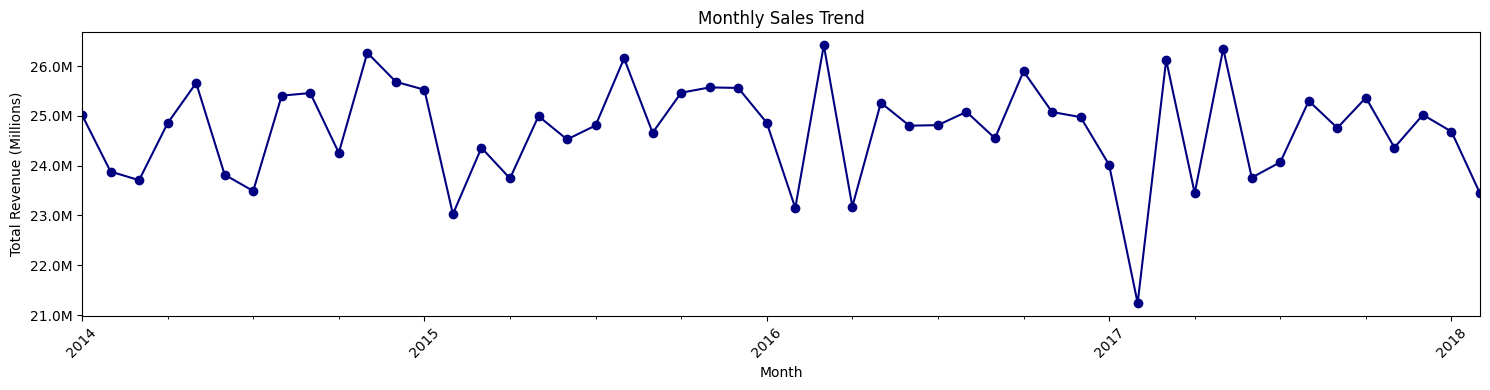

In [135]:
#time series graph

df['order_month'] = df['order_date'].dt.to_period('M')

# Calculate total revenue for each month
monthly_sales = df.groupby('order_month')['revenue'].sum()

# Set figure size for clarity
plt.figure(figsize=(15,4))

# Plot the monthly sales trend with circle markers and navy line
monthly_sales.plot(marker='o', color='navy')

# Scale y-axis values to millions for readability
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Add title and axis labels
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

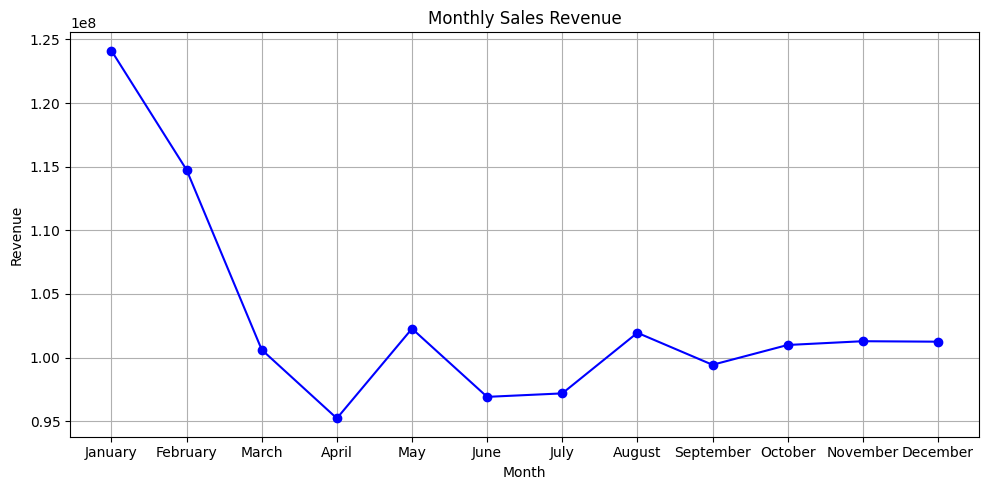

In [136]:
import matplotlib.pyplot as plt

# Step 1: Group by month number and sum the revenue
monthly_sales = df.groupby(['order_month_num', 'order_month_name'])['revenue'].sum().reset_index()

# Step 2: Sort by month number to keep correct order
monthly_sales = monthly_sales.sort_values('order_month_num')

# Step 3: Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['order_month_name'], monthly_sales['revenue'],
         marker='o', linestyle='-', color='blue')

# Step 4: Customize
plt.title('Monthly Sales Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()

# Step 5: Show plot
plt.show()


INSIGHTS ---
Sales consistently cycle between
26 M, with clear peaks in late spring to early summer (May–June) and troughs each January.

The overall trend remains stable year over year, reflecting a reliable seasonal demand pattern.

However, the sharp revenue drop in early 2017 stands out as an outlier, warranting closer investigation into potential causes such as market disruptions or mistimed promotions.


2. Monthly Sales Trend (All Years Combined)
Goal: Highlight overall seasonality patterns by aggregating sales across all years for each calendar month

Chart: Line chart

EDA Type: Temporal (time series)

Structure: Line with markers, months ordered January to December based on month number

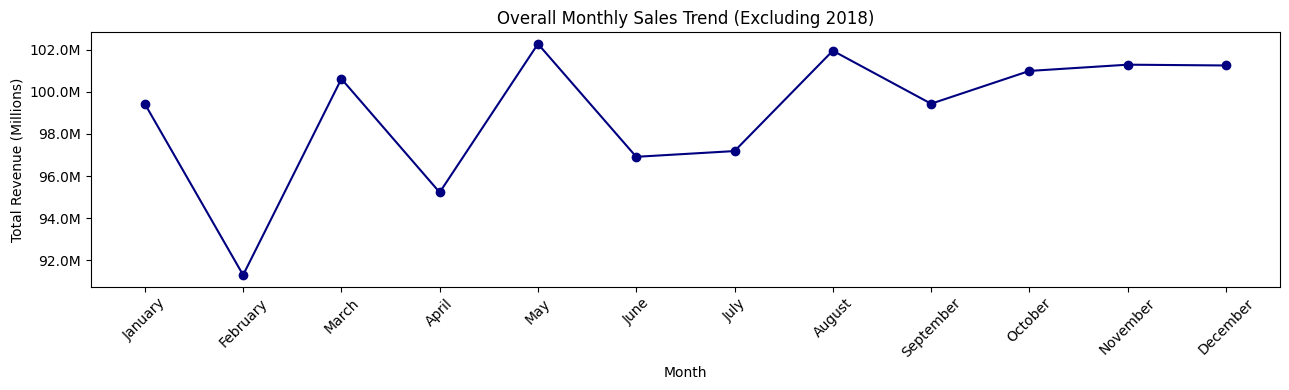

In [138]:
# 1. Filter out any 2018 orders
df_ = df[df['order_date'].dt.year != 2018]   # exclude any partial-year data (i.e., January and February of 2018) so that the monthly totals aren’t skewed by an incomplete year.
                                            #I create df_ so I don’t alter the original df, preserving it intact for other analyses while filtering just for this chart.


# 2. Group by month number and month name, sum revenue, then sort by month number
monthly_sales = (
    df_
    .groupby(['order_month_num', 'order_month_name'])['revenue']
    .sum()
    .sort_index()
)

# 3. Plot setup
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(13, 4))
plt.plot(
    monthly_sales.index.get_level_values(1),  # X-axis: month names
    monthly_sales.values,                     # Y-axis: total revenue
    marker='o',                                # circle markers
    color='navy'                               # line color
)

# 4. Scale y-axis values to millions for readability
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# 5. Add title and axis labels
plt.title('Overall Monthly Sales Trend (Excluding 2018)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

# 6. Rotate x-axis labels for readability
plt.xticks(rotation=45)

# 7. Adjust layout to prevent clipping
plt.tight_layout()

# 8. Display the plot
plt.show()


3. Top 10 Products by Revenue (in Millions)
Goal: Identify the highest-grossing products to focus marketing and inventory efforts

Chart: Horizontal bar chart

EDA Type: Univariate

Structure: Bars sorted descending to show top 10 products with revenue scaled in millions

/tmp/ipython-input-139-2926372669.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


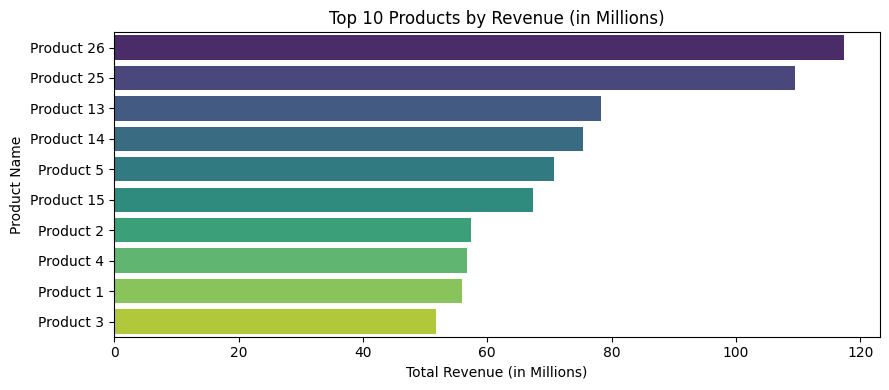

In [139]:
# Calculate total revenue for each product and convert values to millions
top_prod = df.groupby('product_name')['revenue'].sum() / 1_000_000

# Select the top 10 products by revenue
top_prod = top_prod.nlargest(10)

# Set the figure size for clarity
plt.figure(figsize=(9, 4))

# Plot a horizontal bar chart: x-axis as revenue in millions, y-axis as product names
sns.barplot(
    x=top_prod.values,    # X-axis: revenue values in millions
    y=top_prod.index,     # Y-axis: product names
    palette='viridis'     # Color palette for bars
)

# Add title and axis labels
plt.title('Top 10 Products by Revenue (in Millions)')  # Main title
plt.xlabel('Total Revenue (in Millions)')              # X-axis label
plt.ylabel('Product Name')                             # Y-axis label

# Adjust layout to prevent overlapping elements
plt.tight_layout()
plt.show()

4. Top 10 Products by Avg Profit Margin
Goal: Compare average profitability across products to identify high-margin items

Chart: Horizontal bar chart

EDA Type: Univariate

Structure: Bars sorted descending to show top 10 products with average profit margin values

/tmp/ipython-input-141-1714083238.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


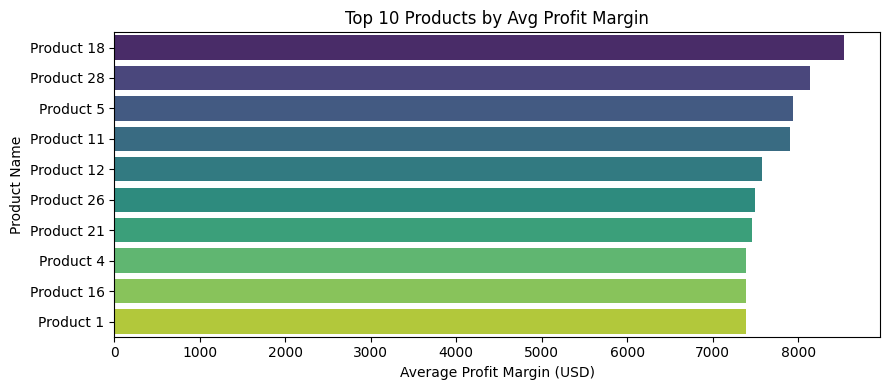

In [141]:
# 1️⃣ Compute average profit per product and take the top 10
top_margin = (
    df.groupby('product_name')['profit']
      .mean()                        # Calculate mean profit for each product
      .sort_values(ascending=False)  # Sort from highest to lowest average profit
      .head(10)                      # Keep only the top 10 products
)

# 2️⃣ Set the figure size for clarity
plt.figure(figsize=(9, 4))

# 3️⃣ Plot a horizontal bar chart
sns.barplot(
    x=top_margin.values,    # X-axis: average profit values
    y=top_margin.index,     # Y-axis: product names
    palette='viridis'       # Color palette for the bars
)

# 4️⃣ Add title and axis labels
plt.title('Top 10 Products by Avg Profit Margin')  # Chart title
plt.xlabel('Average Profit Margin (USD)')          # X-axis label
plt.ylabel('Product Name')                         # Y-axis label

# 5️⃣ Adjust layout to prevent clipping and show the plot
plt.tight_layout()
plt.show()

5. Sales by Channel (Pie Chart)
Goal: Show distribution of total sales across channels to identify dominant sales routes

Chart: Pie chart

EDA Type: Univariate

Structure: Pie segments with percentage labels, colors for clarity, start angle adjusted

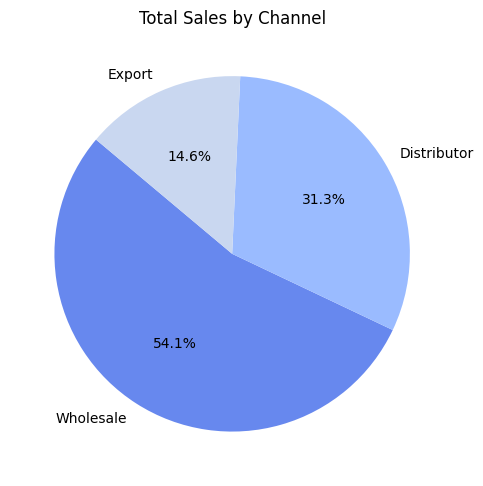

In [142]:
# Group revenue by sales channel and sort descending
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

# Set figure size for the pie chart
plt.figure(figsize=(5, 5))

# Plot pie chart with percentage labels and a defined start angle
plt.pie(
    chan_sales.values,                   # Data: revenue values per channel
    labels=chan_sales.index,             # Labels: channel names
    autopct='%1.1f%%',                   # Display percentages with one decimal
    startangle=140,                      # Rotate chart so first slice starts at 140 degrees
    colors=sns.color_palette('coolwarm') # Color palette for slices
)

# Add title for context
plt.title('Total Sales by Channel')

# Adjust layout to ensure everything fits well
plt.tight_layout()
plt.show()

 6. Average Order Value (AOV) Distribution
Goal: Understand distribution of order values to identify typical spending levels and outliers

Chart: Histogram

EDA Type: Univariate

Structure: Histogram with 50 bins, colored bars with edge highlights to show frequency of order values

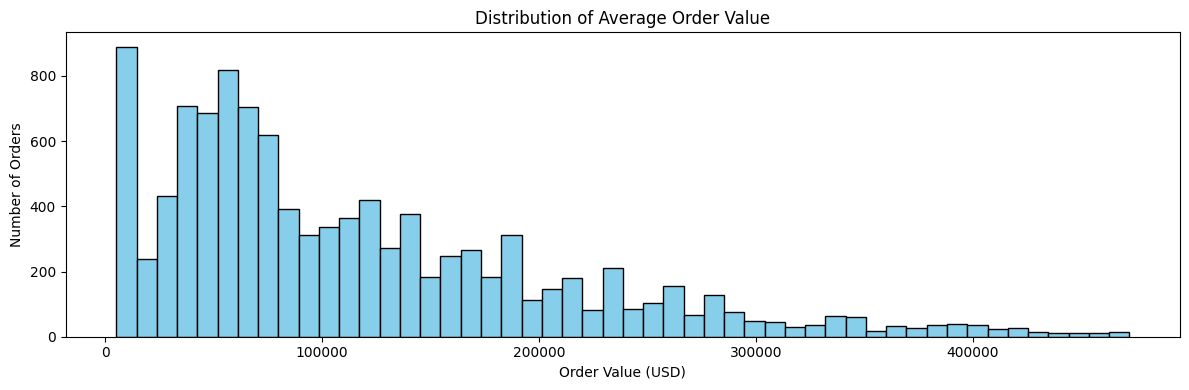

In [143]:
aov = df.groupby('order_number')['revenue'].sum()

# Set the figure size for better visibility
plt.figure(figsize=(12, 4))

# Plot a histogram of order values
plt.hist(
    aov,               # Data: list of order values
    bins=50,           # Number of bins to group order values
    color='skyblue',   # Fill color of the bars
    edgecolor='black'  # Outline color of the bars
)

# Add title and axis labels for context
plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

7. Profit Margin % vs. Unit Price
Goal: Examine relationship between unit price and profit margin percentage across orders

Chart: Scatter plot

EDA Type: Bivariate

Structure: Scatter points with transparency to show data density

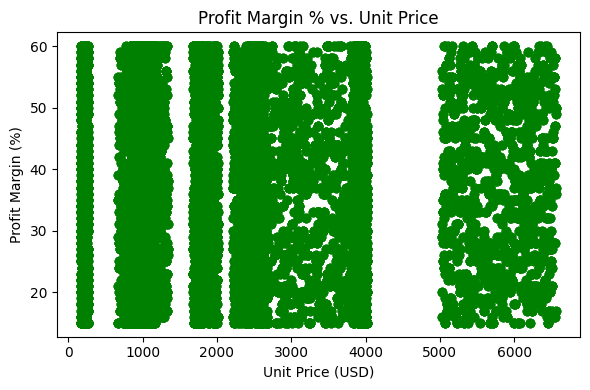

In [144]:
# Calculate profit margin percentage for each record
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot unit price vs. profit margin percentage
plt.scatter(
    df['unit_price'],            # X-axis: unit price in USD
    df['profit_margin_pct'],     # Y-axis: profit margin percentage
    alpha=0.6,                   # Transparency level for overlapping points
    color='green'                # Point color
)

# Add title and axis labels
plt.title('Profit Margin % vs. Unit Price')  # Chart title
plt.xlabel('Unit Price (USD)')                # X-axis label
plt.ylabel('Profit Margin (%)')               # Y-axis label

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()


8. Unit Price Distribution per Product
Goal: Compare pricing variability across different products to identify price consistency and outliers

Chart: Boxplot

EDA Type: Bivariate

Structure: Boxplot with rotated labels to display unit price spread per product

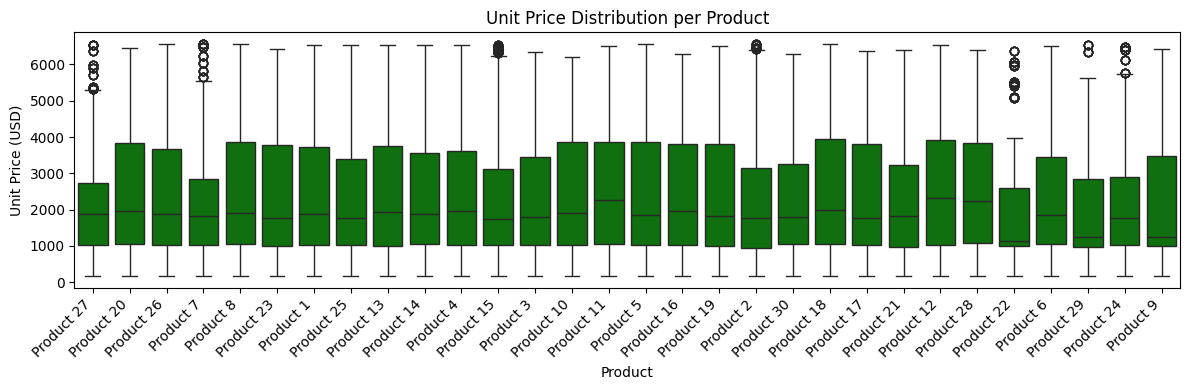

In [146]:
#Set figure size for clarity
plt.figure(figsize=(12,4))

# Create a boxplot of unit_price by product_name
sns.boxplot(
    data=df,
    x='product_name',   # X-axis: product categories
    y='unit_price',      # Y-axis: unit price values
    color='g'            # Box color
)

# Add title and axis labels
plt.title('Unit Price Distribution per Product')  # Chart title
plt.xlabel('Product')                              # X-axis label
plt.ylabel('Unit Price (USD)')                     # Y-axis label

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()


9. Total Sales by US Region
Goal: Compare total sales across U.S. regions to identify top‑performing markets and areas for targeted growth.

Chart: Horizontal bar chart

EDA Type: Univariate comparison

Structure:

Bars sorted ascending (Northeast → West) for clear bottom‑to‑top ranking
X‑axis in millions USD, Y‑axis listing regions

/tmp/ipython-input-149-4207886414.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


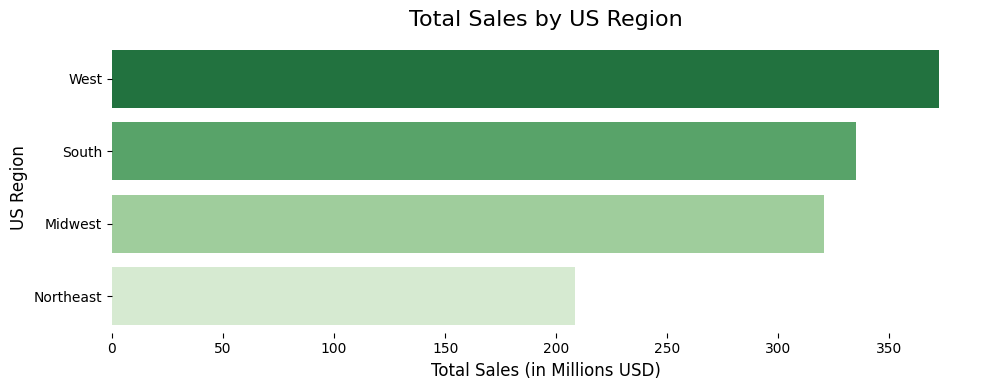

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aggregate total sales by region (in millions)
region_sales = (
    df.groupby('region')['revenue']
    .sum()
    .sort_values(ascending=False)  # so bars go top→bottom
    / 1e6                         # convert to millions
)

# 2. Plot
plt.figure(figsize=(10, 4))
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='Greens_r'          # dark→light green
)

# 3. Formatting
plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

10. Total Sales by State (Choropleth Map)
Goal: Visualize geographic distribution of sales to identify high- and low-performing states and uncover regional gaps.

Chart: US choropleth map

EDA Type: Univariate geospatial

Structure:

States shaded by total sales (in millions USD) using a blue gradient
Legend on the right showing sales scale (M USD)
Hover tooltips display exact sales for each state
Map scoped to USA for clear regional context

In [150]:
import plotly.express as px

# 1. Aggregate revenue by state (in millions)
state_sales = (
    df
    .groupby('state')['revenue']
    .sum()
    .reset_index()
)
state_sales['revenue_m'] = state_sales['revenue'] / 1e6  # convert to millions

# 2. Plotly choropleth
fig = px.choropleth(
    state_sales,
    locations='state',            # column with state codes
    locationmode='USA-states',    # tells Plotly these are US states
    color='revenue_m',
    scope='usa',
    labels={'revenue_m':'Total Sales (M USD)'},
    color_continuous_scale='Blues',
    hover_data={'revenue_m':':.2f'}  # show 2 decimals
)
fig.update_layout(
    title_text='Total Sales by State',
    margin=dict(l=0, r=0, t=40, b=0),
    coloraxis_colorbar=dict(
        title='Sales (M USD)',
        ticksuffix='M'
    )
)

fig.show()


Goal: Identify highest revenue-generating states and compare their order volumes

Chart: Two bar charts

EDA Type: Multivariate

Structure: First chart shows top 10 states by revenue (in millions), second shows top 10 states by number of orders

/tmp/ipython-input-158-2878831388.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-158-2878831388.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




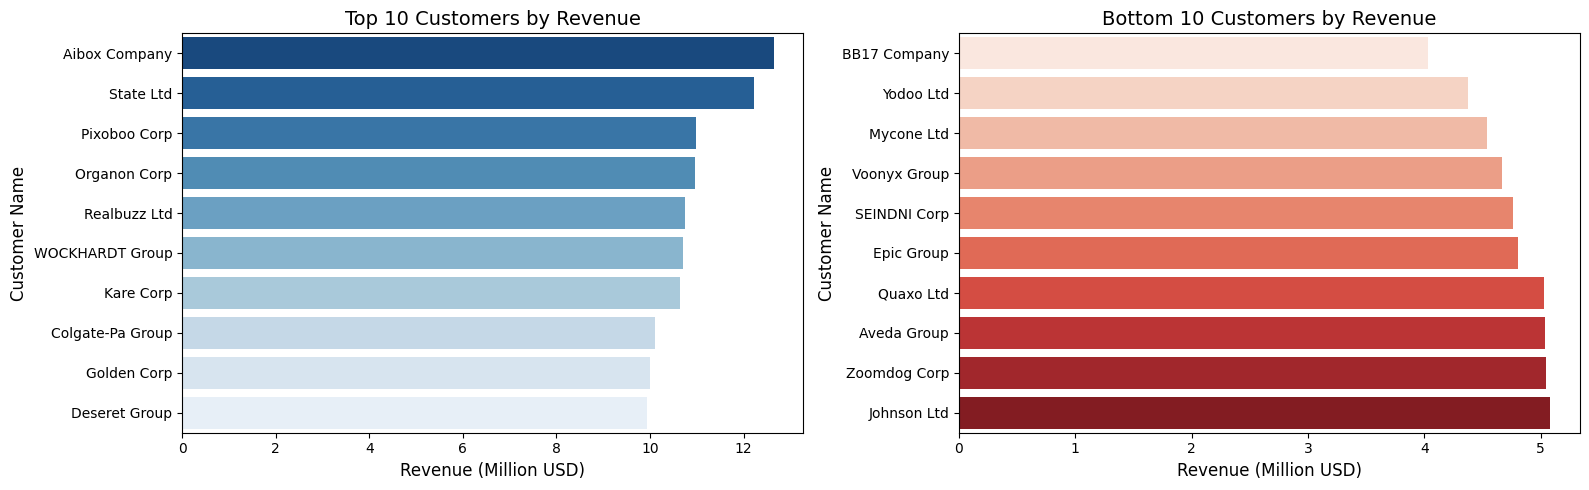

In [158]:
# 🔝 Calculate total revenue per customer and select top 10
top_rev = (
    df.groupby('customer names')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=False) # Sort from highest to lowest
      .head(10)                     # Keep top 10 customers
)

# 🔻 Calculate total revenue per customer and select bottom 10
bottom_rev = (
    df.groupby('customer names')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=True)  # Sort from lowest to highest
      .head(10)                     # Keep bottom 10 customers
)

# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Top 10 customers by revenue (converted to millions)
sns.barplot(
    x=top_rev.values / 1e6,    # X-axis: revenue in millions
    y=top_rev.index,           # Y-axis: customer names
    palette='Blues_r',
    ax=axes[0]                 # Draw on the left subplot
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)         # Title
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[0].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Plot 2: Bottom 10 customers by revenue (converted to millions)
sns.barplot(
    x=bottom_rev.values / 1e6, # X-axis: revenue in millions
    y=bottom_rev.index,        # Y-axis: customer names
    palette='Reds',            # Color palette (reds)
    ax=axes[1]                 # Draw on the right subplot
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)      # Title
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[1].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Adjust layout to prevent overlap and display both charts
plt.tight_layout()
plt.show()

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_number       64104 non-null  object        
 1   order_date         64104 non-null  datetime64[ns]
 2   customer names     64104 non-null  object        
 3   channel            64104 non-null  object        
 4   product_name       64104 non-null  object        
 5   order_quantity     64104 non-null  int64         
 6   unit_price         64104 non-null  float64       
 7   revenue            64104 non-null  float64       
 8   total unit cost    64104 non-null  float64       
 9   state              64104 non-null  object        
 10  county             64104 non-null  object        
 11  state_name         64104 non-null  object        
 12  region             64104 non-null  object        
 13  lat                64104 non-null  float64       
 14  long  

12. Average Profit Margin by Channel
Goal: Compare average profit margins across sales channels to identify the most and least profitable routes

Chart: Bar chart

EDA Type: Bivariate

Structure: Vertical bars with data labels showing margin percentages, sorted descending by channel

/tmp/ipython-input-159-2972483453.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




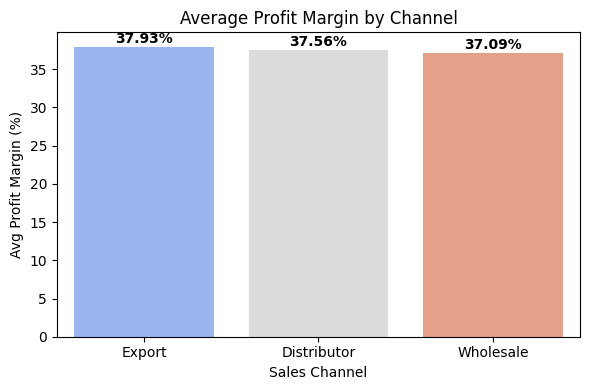

In [159]:
# 1️⃣ Compute average profit margin percentage for each channel
channel_margin = (
    df.groupby('channel')['profit_margin_pct']  # Group by sales channel
      .mean()                                  # Calculate mean profit margin %
      .sort_values(ascending=False)            # Sort channels from highest to lowest margin
)

# 2️⃣ Set the figure size for clarity
plt.figure(figsize=(6, 4))

# 3️⃣ Plot a bar chart of average profit margin by channel
ax = sns.barplot(
    x=channel_margin.index,    # X-axis: channel names
    y=channel_margin.values,   # Y-axis: average profit margin values
    palette='coolwarm'         # Color palette for bars
)

# 4️⃣ Add chart title and axis labels
plt.title('Average Profit Margin by Channel')  # Main title
plt.xlabel('Sales Channel')                    # X-axis label
plt.ylabel('Avg Profit Margin (%)')             # Y-axis label
# 5️⃣ Annotate each bar with its exact margin percentage
for i, v in enumerate(channel_margin.values):
    ax.text(
        i,                  # X position (bar index)
        v + 0.5,            # Y position (bar height + small offset)
        f"{v:.2f}%",        # Text label showing percentage with two decimals
        ha='center',        # Center-align the text horizontally
        fontweight='bold'   # Bold font for readability
    )

# 6️⃣ Adjust layout to prevent clipping and display the plot
plt.tight_layout()
plt.show()

13. Top and Bottom 10 Customers by Revenue
Goal: Identify your highest- and lowest-revenue customers to tailor engagement strategies

Chart: Side-by-side horizontal bar charts

EDA Type: Multivariate

Structure: Left chart shows top 10 customers by revenue (in millions), right chart shows bottom 10 customers by revenue (in millions)

/tmp/ipython-input-160-2380990184.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




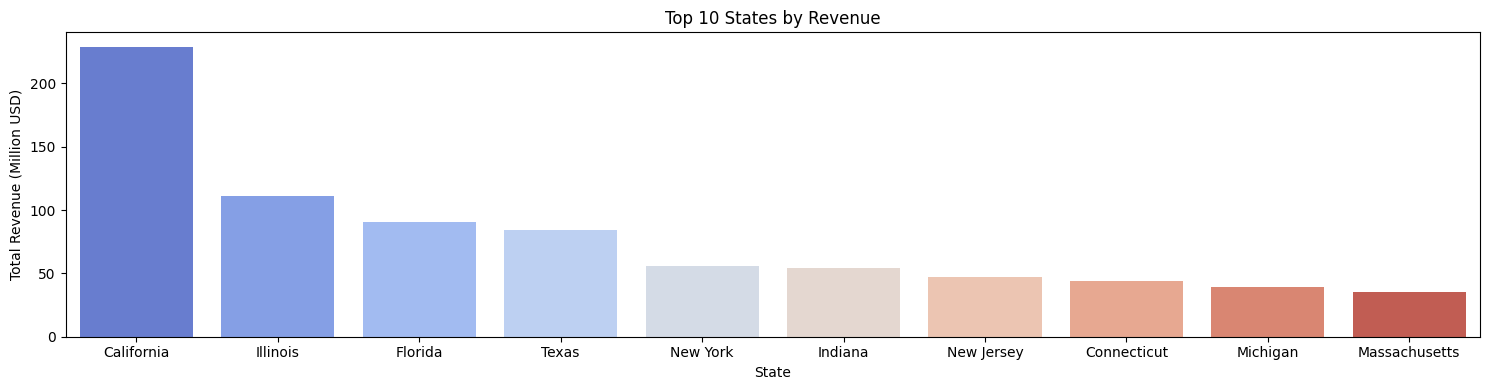

/tmp/ipython-input-160-2380990184.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




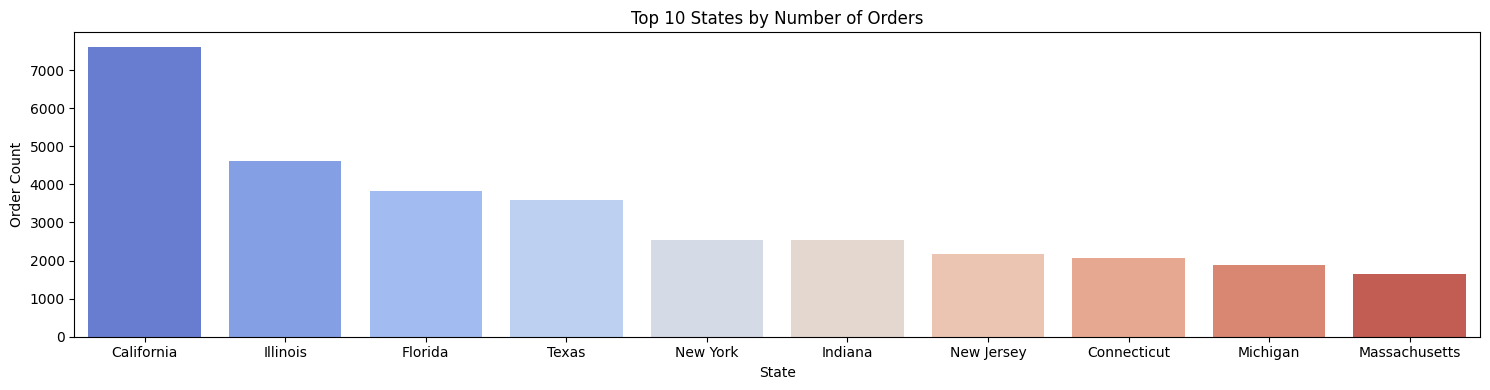

In [160]:
# Aggregate total revenue and unique order count per state
state_rev = df.groupby('state_name').agg(
    revenue=('revenue', 'sum'),          # Sum up revenue per state
    orders=('order_number', 'nunique')   # Count unique orders per state
).sort_values('revenue', ascending=False).head(10)  # Keep top 10 by revenue

# Plot 1: Top 10 states by revenue (scaled to millions)
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['revenue'] / 1e6,        # Y-axis: revenue in millions
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Revenue')     # Chart title
plt.xlabel('State')                       # X-axis label
plt.ylabel('Total Revenue (Million USD)') # Y-axis label
plt.tight_layout()                        # Adjust layout
plt.show()                                # Display the plot

# Plot 2: Top 10 states by number of orders
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['orders'],               # Y-axis: order counts
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Number of Orders')  # Chart title
plt.xlabel('State')                              # X-axis label
plt.ylabel('Order Count')                        # Y-axis label
plt.tight_layout()                               # Adjust layout
plt.show()

14. Customer Segmentation: Revenue vs. Profit Margin
Goal: Segment customers by total revenue and average profit margin, highlighting order volume

Chart: Bubble chart (scatter plot with variable point sizes)

EDA Type: Multivariate

Structure: Scatter points sized by number of orders, plotting revenue vs. margin

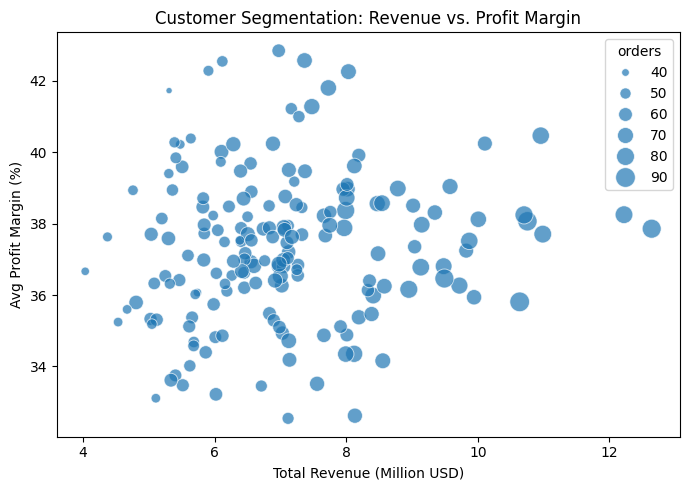

In [162]:
cust_summary = df.groupby('customer names').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',        # <-- use revenue in millions
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  # <-- updated label
plt.ylabel('Avg Profit Margin (%)')
plt.tight_layout()
plt.show()

15. Correlation Heatmap of Numeric Features
Goal: Identify relationships among key numeric variables to uncover potential multicollinearity

Chart: Correlation heatmap

EDA Type: Multivariate

Structure: Annotated heatmap with correlation coefficients for selected numeric columns

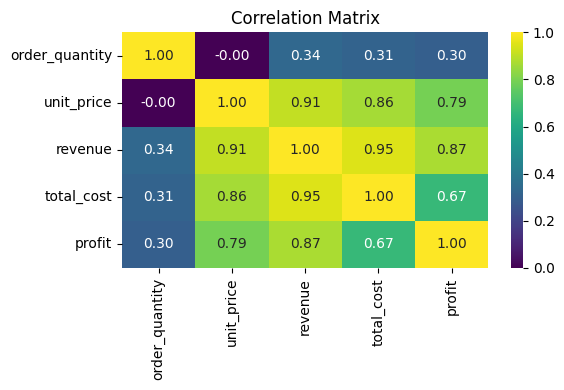

In [168]:
# List numeric columns to include in the correlation calculation
num_cols = ['order_quantity', 'unit_price', 'revenue', 'total_cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    corr,           # Data: correlation matrix
    annot=True,     # Display the correlation coefficients on the heatmap
    fmt=".2f",      # Format numbers to two decimal places
    cmap='viridis'  # Color palette for the heatmap
)

# Add title for context
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the heatmap
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_number       64104 non-null  object        
 1   order_date         64104 non-null  datetime64[ns]
 2   customer names     64104 non-null  object        
 3   channel            64104 non-null  object        
 4   product_name       64104 non-null  object        
 5   order_quantity     64104 non-null  int64         
 6   unit_price         64104 non-null  float64       
 7   revenue            64104 non-null  float64       
 8   total unit cost    64104 non-null  float64       
 9   state              64104 non-null  object        
 10  county             64104 non-null  object        
 11  state_name         64104 non-null  object        
 12  region             64104 non-null  object        
 13  lat                64104 non-null  float64       
 14  long  

In [169]:
df

order_number order_date    customer names      channel product_name  \
0       SO - 000225 2014-01-01     Rhynoodle Ltd    Wholesale   Product 27   
1      SO - 0003378 2014-01-01    Thoughtmix Ltd  Distributor   Product 20   
2      SO - 0005126 2014-01-01   Amerisourc Corp    Wholesale   Product 26   
3      SO - 0005614 2014-01-01  Colgate-Pa Group       Export    Product 7   
4      SO - 0005781 2014-01-01     Deseret Group    Wholesale    Product 8   
...             ...        ...               ...          ...          ...   
64099  SO - 0007573 2018-02-28   Dazzlesphe Corp    Wholesale   Product 26   
64100  SO - 0007706 2018-02-28        Yombu Corp       Export   Product 21   
64101  SO - 0007718 2018-02-28        Bath Group  Distributor   Product 13   
64102  SO - 0008084 2018-02-28     Linklinks Ltd  Distributor   Product 20   
64103  SO - 0008654 2018-02-28       SAFEWAY Ltd  Distributor   Product 15   

       order_quantity  unit_price  revenue  total unit cost state  ...  \
0                   6      2499.1  14994.6         1824.343    GA  ...   
1                  11      2351.7  25868.7         1269.918    IN  ...   
2                   6       978.2   5869.2          684.740    CA  ...   
3                   7      2338.3  16368.1         1028.852    IN  ...   
4                   8      2291.4  18331.2         1260.270    CT  ...   
...               ...         ...      ...              ...   ...  ...   
64099              12      1815.7  21788.4          980.478    PA  ...   
64100               6       864.3   5185.8          579.081    IL  ...   
64101              11      3953.0  43483.0         2648.510    FL  ...   
64102               7      3959.7  27717.9         2930.178    NY  ...   
64103               8       998.3   7986.4          848.555    OR  ...   

          region       lat       long  budgets  total_cost     profit  \
0          South  32.08354  -81.09983      NaN   10946.058   4048.542   
1        Midwest  39.61366  -86.10665      NaN   13969.098  11899.602   
2           West  37.66243 -121.87468      NaN    4108.440   1760.760   
3        Midwest  39.16533  -86.52639      NaN    7201.964   9166.136   
4      Northeast  41.77524  -72.52443      NaN   10082.160   8249.040   
...          ...       ...        ...      ...         ...        ...   
64099  Northeast  40.15511  -74.82877      NaN   11765.736  10022.664   
64100    Midwest  42.11030  -88.03424      NaN    3474.486   1711.314   
64101      South  26.24453  -80.20644      NaN   29133.610  14349.390   
64102  Northeast  42.91002  -78.74182      NaN   20511.246   7206.654   
64103       West  45.48706 -122.80371      NaN    6788.440   1197.960   

       profit_margin_pct  order_month_name  order_month_num order_month  
0                   27.0           January                1     2014-01  
1                   46.0           January                1     2014-01  
2                   30.0           January                1     2014-01  
3                   56.0           January                1     2014-01  
4                   45.0           January                1     2014-01  
...                  ...               ...              ...         ...  
64099               46.0          February                2     2018-02  
64100               33.0          February                2     2018-02  
64101               33.0          February                2     2018-02  
64102               26.0          February                2     2018-02  
64103               15.0          February                2     2018-02  

[64104 rows x 22 columns]

In [170]:
df.to_csv("SalesdataafterPP.csv")